### Scikit-learn
<li>Simple and efficient tools for data mining and data analysis
<li>Accessible to everybody, and reusable in various contexts
<li>Built on NumPy, SciPy, and matplotlib
<li>Open source, commercially usable

### What we can achieve using sciket-learn
<b>Classfication</b>
    <br>Identifying which category an object belongs to.
   <br> <b>Applications</b>: Spam detection, image recognition.</b>
   <br>
<br><b>Regression</b>
   <br> Predicting a continuous-valued attribute associated with an object.
   <br> <b>Applications</b>:Drug response, Stock prices.</b>
   <br>
<br><b>Clustering</b>
<br>Automatic grouping of similar objects into sets.
<br> <b>Applications</b>:Customer segmentation, Grouping experiment outcomes.</b>
<br>
<br><b>Model selection</b>
<br>Comparing, validating and choosing parameters and models.
<br> <b>Applications</b>Improved accuracy via parameter tuning.</b>
<br>
<br><b>Preprocessing</b>
<br>Feature extraction and normalization.
<br> <b>Applications:</b> Transforming input data such as text for use with machine learning algorithms.

In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
#checking to see if there's any null variables
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [25]:
#Preprocessing Data
bins=(2,6.5,8)
group_names=['Bad','Good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)
wine['quality'].unique()

['Bad', 'Good']
Categories (2, object): ['Bad' < 'Good']

In [27]:
##Now lets assign a labels to our quality variable We use sklearn
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [28]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

#Bad becomes 0 and good becomes 1 

In [30]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [31]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Sikandar Hayat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

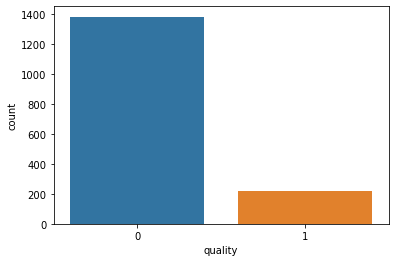

In [36]:
sns.countplot(wine['quality'])

In [34]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [35]:
#Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
#Applying Standard scaling to get optimized result
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### LogisticRegression

In [48]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

#
model.score(X_test,y_test)

0.875

In [64]:
#Prediction
y_pred=model.predict(X_test)
len(y_pred)
print(y_pred[200:210])
print(y_test[200:210])

[0 0 0 0 1 0 0 0 0 0]
727     0
614     0
309     0
78      0
1167    1
1473    0
1385    0
679     0
371     0
584     1
Name: quality, dtype: int32


In [67]:
#Let's see how our model performed
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [74]:
#Confusion matrix for the Logistic Regression
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[268,   5],
       [ 35,  12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

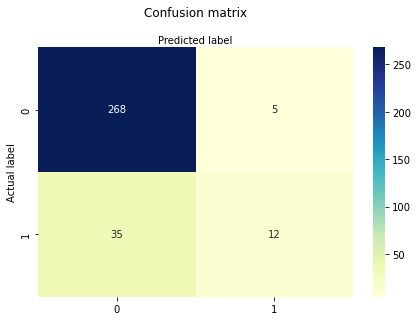

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,y_pred)
cm

0.875

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


### Neural Network


In [90]:
from sklearn.neural_network import MLPClassifier
Model = MLPClassifier(hidden_layer_sizes=(100,200,400,500), max_iter=1000)

In [91]:
#Train Neural Network
Model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 200, 400, 500), max_iter=1000)

In [92]:
Model.score(X_test,y_test)

0.903125

In [93]:
#Prediction
y_pred=Model.predict(X_test)
len(y_pred)
print(y_pred[200:210])
print(y_test[200:210])

[0 0 0 0 1 0 0 0 0 1]
727     0
614     0
309     0
78      0
1167    1
1473    0
1385    0
679     0
371     0
584     1
Name: quality, dtype: int32


In [94]:
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[261,  12],
       [ 19,  28]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

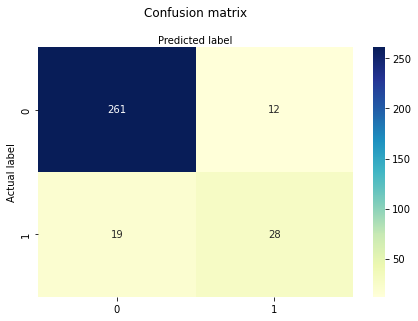

In [95]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [127]:
Model_2 = MLPClassifier(hidden_layer_sizes=(100,150,200,500), max_iter=1000,activation='logistic',batch_size=32)# default=’relu’

In [128]:
Model_2.fit(X_train,y_train)

MLPClassifier(activation='logistic', batch_size=32,
              hidden_layer_sizes=(100, 150, 200, 500), max_iter=1000)

In [129]:
Model_2.score(X_test,y_test)

0.86875

In [ ]:
# class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,),
#                                            activation='relu', *, solver='adam',
#                                            alpha=0.0001, batch_size='auto',
#                                            learning_rate='constant',
#                                            learning_rate_init=0.001, 
#                                            power_t=0.5, max_iter=200, 
#                                            shuffle=True, random_state=None,
#                                            tol=0.0001, verbose=False,
#                                            warm_start=False, momentum=0.9,
#                                            nesterovs_momentum=True, early_stopping=False, 
#                                            validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
#                                            epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [130]:
Xnew = [[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
Xnew=sc.transform(Xnew)
ynew = Model_2.predict(Xnew)
if(ynew):
    print("Wine is Good")
else:
    print('Wine is bad')

Wine is bad


### Save and Load Machine Learning Models in Python with scikit-learn

In [131]:
import pickle

In [132]:
# save the model to disk
filename = 'Wine_Neural_network.sav'
pickle.dump(Model_2, open(filename, 'wb'))
 


In [134]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.86875


In [144]:
Xnew = [[7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]]
Xnew=sc.transform(Xnew)
ynew = loaded_model.predict(Xnew)
if(ynew):
    print("Wine is Good")
else:
    print('Wine is bad')

Wine is bad


In [145]:
ynew

array([0])

### What is Feature Scaling?
Feature Scaling is a method to scale numeric feature in the same scale or range (like:-1 to 1, 0 to 1).
<br>This last step involved in Data Preprocessing and before ML Model training.
<br>It is also called data normalization
<br>We apply feature scaling om independent variable.

### Why Feature Scaling?
The Scale of raw feature is different according to its units.
<br>Machine learning algorithms can not understand feature units,understand only number
<b><br>Ex: if hight 140cm and 8.2feet</b>
    <br>Types Of Scaler 
    <br>Min Max Scaler, Standard Scaler, Max Abs Scaler etc

### What is Normalization?
<li>Normalization rescale the feature in fixed range b/w 0 and 1.
    <br><li>Normalization also calles as Min-Max Scalling.
        <br><li>If data doesn't follow normal distribution(Gussian Distribution).

### Standardization Vs Normalization ?
<li>There is no any thumb rule to use Standardization or Normalization for Special Ml algo.
<br><li>But mostly Standaridization use clustring analysis,Princpal Component Analysis(PCA). 
    <br><li>Normalization prefer for image processing because pixel intensity b/w 0 to 255,neural network algorith require in scale 0-1,K-Nearest Neighbors.

In [148]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [151]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [155]:
df2=df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [157]:
#checking to see if there's any null variables
df2.isnull().sum()

survived      0
pclass        0
age         177
parch         0
dtype: int64

In [158]:
df3=df2.fillna(df2.mean())

In [159]:
X=df3.drop('survived',axis=1)
Y=df3['survived']

In [162]:
#Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [163]:
# Standard Scaler
sc=StandardScaler()
sc.fit(X_train )

StandardScaler()

In [164]:
sc.mean_

array([ 2.33005618, 29.53822538,  0.37921348])

In [165]:
sc.scale_

array([ 0.82400502, 12.98541943,  0.79111317])

In [169]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.330056,29.538225,0.379213
std,0.824584,12.994548,0.791669
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [176]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [177]:
X_train_sc

array([[-1.61413602,  1.22920747, -0.47934164],
       [-0.40055118, -0.50350514, -0.47934164],
       [ 0.81303367,  0.18957991, -0.47934164],
       ...,
       [ 0.81303367,  0.88266495, -0.47934164],
       [-1.61413602, -1.19659018,  2.04874166],
       [-1.61413602, -0.65752403,  0.78470001]])

In [178]:
X_train_sc=pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc=X_train_sc=pd.DataFrame(X_test_sc,columns=['pclass','age','parch'])

In [179]:
X_test_sc.head()

,pclass,age,parch
0,0.813034,0.012390,0.784700
1,-0.400551,0.112570,-0.479342
2,0.813034,-0.734533,-0.479342
3,-0.400551,-1.812666,0.784700
4,0.813034,-1.196590,-0.479342


In [180]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,-0.13,0.06,0.01
std,1.06,1.00,1.09
min,-1.61,-2.21,-0.48
25%,-1.61,-0.58,-0.48
50%,0.81,0.01,-0.48
75%,0.81,0.50,-0.48
max,0.81,3.19,5.84


In [182]:
# Min Max Scaler
mmc=MinMaxScaler()
mmc.fit(X_train )

MinMaxScaler()

In [183]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [184]:
X_train_mmc

array([[0.        , 0.56647399, 0.        ],
       [0.5       , 0.28373963, 0.        ],
       [1.        , 0.39683338, 0.        ],
       ...,
       [1.        , 0.50992712, 0.        ],
       [0.        , 0.17064589, 0.33333333],
       [0.        , 0.25860769, 0.16666667]])

In [185]:
X_train_mmc=pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc=X_train_sc=pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [186]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.61,0.38,0.07
std,0.44,0.16,0.14
min,0.00,0.01,0.00
25%,0.00,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.45,0.00
max,1.00,0.89,0.83


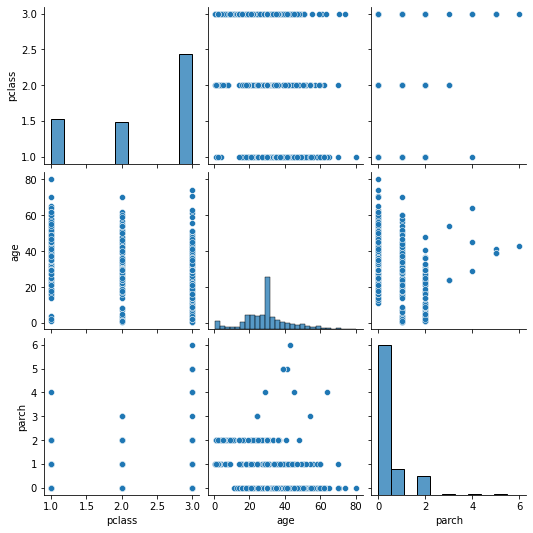

In [187]:
sns.pairplot(X_train)

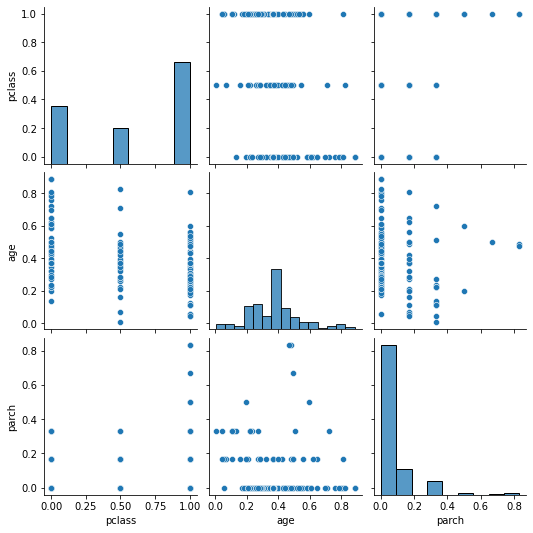

In [188]:
sns.pairplot(X_train_sc)

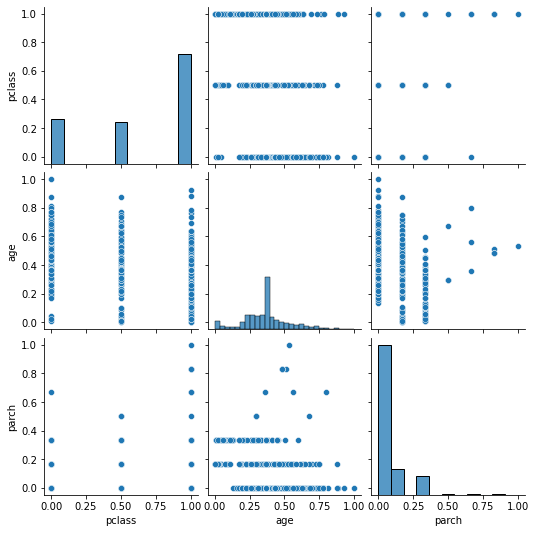

In [189]:
sns.pairplot(X_train_mmc)